# 使用Scikit-Learn 完成預測
### Scikit-Learn在三個面向提供支援。
1. 獲取資料:***klearn.datasets***
2. 掌握資料:***sklearn.preprocessing*** 
3. 機器學習:***sklearn Estimator API*** 

獲取資料的方式有很多種（包含檔案、資料庫、網路爬蟲、Kaggle Datasets等），<br>
其中最簡單的方式是從Sklearn import 內建的資料庫。由於其特性隨手可得且不用下載，所以我們通常叫他**玩具資料**：

# 基本架構

* 讀取資料&pre-processing
* 切分訓練集與測試集 
* 模型配適
* 預測 
* 評估(計算成績可能是誤差值或正確率或..)


In [1]:
%matplotlib inline

from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 讀取Iris資料集與資料前處理

Iris Flowers 資料集

我們在這個項目中使用 Iris Data Set，這個資料集中的每個樣本有4個特徵，1個類別。該資料集1中的樣本類別數為3類，每類樣本數目為50個，總共150個樣本。

屬性資訊：

    花萼長度 sepal length(cm)
    花萼寬度 sepal width(cm)
    花瓣長度 petal length(cm)
    花瓣寬度 petal width(cm)
    類別：
        Iris Setosa
        Iris Versicolour
        Iris Virginica

樣本特徵資料是數值型的，而且單位都相同（釐米）。

![Iris Flowers](images/iris_data.PNG)


In [3]:
iris = datasets.load_iris() #資料載入
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

* 印出iris的key值與檔案位置
* 查看前10筆資料
* 查看資料型別
* 印出標註的樣本類別資料

In [17]:
print(iris.keys())

print(iris.data[0:10])

print(type(iris.data))

print(iris.target)

print(iris['filename'])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
<class 'numpy.ndarray'>
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris.csv


In [25]:
# we only take the first two features. 
X = iris.data[:,:2]
print(X.shape)
Y= iris.target
print(Y.shape)

(150, 2)
(150,)


In [33]:
X

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [31]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [35]:
#以下是組成 pandas DataFrame (也可以不用這種做)
x = pd.DataFrame(iris.data, columns=iris['feature_names'])
x.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [37]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [45]:
#建立Target欄位與資料
y = pd.DataFrame(iris['target'],columns = ['target'])
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [49]:
#合併資料特徵欄位與目標欄位
iris_data = pd.concat([x,y],axis=1)
iris_data = iris_data[['sepal length (cm)','petal length (cm)','target']]
iris_data.head(10)


,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
5,5.4,1.7,0
6,4.6,1.4,0
7,5.0,1.5,0
8,4.4,1.4,0
9,4.9,1.5,0


In [57]:
#只選擇目標為0與1的資料
iris_data = iris_data[iris_data['target'].isin([0,1])]
iris_data
#print(iris['data'].size/len(iris['feature_names']))

,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
...,...,...,...
95,5.7,4.2,1
96,5.7,4.2,1
97,6.2,4.3,1
98,5.1,3.0,1


## 切分訓練集與測試集
> train_test_split()

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(iris_data[['sepal length (cm)','petal length (cm)']],iris_data['target'],test_size=0.3)

In [73]:
X_train.head()

,sepal length (cm),petal length (cm)
39,5.1,1.5
98,5.1,3.0
67,5.8,4.1
37,4.9,1.4
94,5.6,4.2


In [79]:
X_train.head()
X_train.shape

(70, 2)

In [81]:
X_test.head()
X_test.shape

(30, 2)

In [87]:
Y_train.head()
Y_train.shape

(70,)

In [93]:
Y_test.head()
Y_test.shape

(30,)

# Appendix 

>normalization和standardization是差不多的<br>
都是把數據進行前處理，從而使數值都落入到統一的數值範圍，從而在建模過程中，各個特徵量沒差別對待。<br> 
* normalization一般是把數據限定在需要的範圍，比如一般都是【0，1】，從而消除了數據量綱對建模的影響。<br> 
* standardization 一般是指將數據正態化，使平均值0方差為1.<br> 

因此normalization和standardization 是針對數據而言的，消除一些數值差異帶來的特種重要性偏見。<br>
經過歸一化的數據，能加快訓練速度，促進算法的收斂。

### Standardization (z-score)
    to compute the mean and standard deviation on a training set so as to be able to later reapply the same transformation on the testing set. 

In [99]:
from IPython.display import Math
Math(r'x^{(i)}_{norm}=\frac{x^{(i)}-x_{min}}{x_{max}-x_{min}}')

<IPython.core.display.Math object>

In [103]:
Math(r'x^{(i)}_{std}=\frac{x^{(i)}-\mu_{x}}{\sigma_{x}}')

<IPython.core.display.Math object>

In [137]:
def norm_stats(dfs):
    minimum = dfs.min()
    maximum = dfs.max()
    mu = dfs.mean()
    sigma = dfs.std()
    return (minimum, maximum, mu, sigma)


def z_score(col, stats):
    minimum, maximum, mu, sigma = stats
    df = pd.DataFrame()
    for c in col.columns:
        df[c] = (col[c] - mu[c]) / sigma[c]
    return df

In [145]:
# 計算統計數據
stats = norm_stats(X_train)
# 計算 z-score 標準化數據
arr_x_train = np.array(z_score(X_train, stats))
arr_x_train

arr_x_test = np.array(z_score(X_test, stats))
arr_x_test

# 查看前 5 行
print(arr_x_train[:5])

# 轉換 Y_train 為 numpy array
arr_y_train = np.array(Y_train)
print(arr_y_train)
arr_y_train = np.array(Y_train)

# 轉換 Y_test 為 numpy array
arr_y_test = np.array(Y_test)
print(arr_y_test)
arr_y_test = np.array(Y_test)

[[-0.57867812 -0.94631438]
 [-0.57867812  0.09196159]
 [ 0.52463814  0.85336396]
 [-0.89391134 -1.01553278]
 [ 0.20940492  0.92258236]]
[0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 0 1 0 1 0 1 0 0 1 0
 0 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 1 0 0 1 1]
[1 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 0 0]


## use sklearn

In [147]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)  #Compute the statistics to be used for later scaling.
print(sc.mean_)  #mean
print(sc.scale_) #standard deviation

[5.46714286 2.86714286]
[0.62990281 1.43434619]


In [151]:
#transform: (x-u)/std.
X_train_std = sc.transform(X_train)
X_train_std[:5]

X_test_std = sc.transform(X_test)
X_test_std[:5]

array([[ 0.21091689,  0.72008916],
       [ 1.00469014,  0.78980734],
       [ 0.84593549,  1.13839822],
       [-0.42410171, -0.95314707],
       [-1.3766296 , -0.95314707]])

The scaler instance can then be used on new data to transform it the same way it did on the training set:

In [156]:
X_test_std = sc.transform(X_test)
print(X_test_std[:10])

[[ 0.21091689  0.72008916]
 [ 1.00469014  0.78980734]
 [ 0.84593549  1.13839822]
 [-0.42410171 -0.95314707]
 [-1.3766296  -0.95314707]
 [ 0.05216224  1.06868004]
 [-0.90036566 -0.95314707]
 [-0.10659241  1.13839822]
 [ 1.63970874  1.2081164 ]
 [-0.10659241 -0.81371071]]


you can also use fit_transform method (i.e., fit and then transform)    

In [160]:
X_train_std = sc.fit_transform(X_train)  
X_test_std = sc.fit_transform(X_test)
print(X_test_std[:10])


[[ 0.18237728  0.72119808]
 [ 0.94228261  0.78966626]
 [ 0.79030155  1.13200712]
 [-0.42554699 -0.92203806]
 [-1.33743338 -0.92203806]
 [ 0.03039621  1.06353895]
 [-0.88149018 -0.92203806]
 [-0.12158485  1.13200712]
 [ 1.55020688  1.20047529]
 [-0.12158485 -0.78510171]]


In [162]:
print('mean of X_train_std:',np.round(X_train_std.mean(),4))
print('std of X_train_std:',X_train_std.std())

mean of X_train_std: -0.0
std of X_train_std: 0.9999999999999998


## Min-Max Normaliaztion
    Transforms features by scaling each feature to a given range.
    The transformation is given by:

    X' = X - X.min(axis=0) / ((X.max(axis=0) - X.min(axis=0))
    X -> N 維資料
    


48.879182999602875
30.359434018554094
[50.25576647 38.59537904 54.86539419 46.43397678 47.17736877 43.72662887
 51.72711907 56.26184311 51.80073132 59.65561097 51.602414   45.20231839
 55.44076939 45.43702041 47.24455646 40.80145095 47.04858527 53.7524197
 50.71886429 44.29408666 38.8538947  45.91181143 45.92652862 52.41639807
 57.73119224 44.07830713 43.25975323 50.83930872 44.48728692 39.11295
 38.37172953 35.51402641 70.73925657 50.83687259 55.81929712 49.36869126
 55.97768549 50.29417912 57.82625779 39.63073802 51.09085589 51.38456911
 40.66170721 48.79767566 45.67680833 53.47298396 46.3891915  49.98783933
 44.99735037 48.84553316 43.34119239 51.64266877 52.12269106 49.94489259
 48.48177433 54.88282772 47.83255981 45.26262525 47.84071936 52.6959344
 43.09081672 47.60058742 59.53405683 44.4358583  47.73131033 53.43404917
 45.66551316 38.78550563 52.11903206 40.70684235 47.98522539 43.82610523
 62.05143003 65.30310301 48.32443985 42.20392326 56.82919833 51.77971426
 32.5229302  44.24

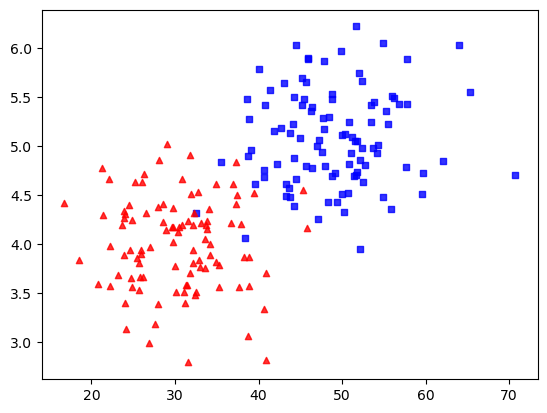

In [188]:
x1 = np.random.normal(50, 6, 100)  # np.random.normal(mu,sigma,size))
y1 = np.random.normal(5, 0.5, 100)

x2 = np.random.normal(30,6,100)
y2 = np.random.normal(4,0.5,100)
plt.scatter(x1,y1,c='b',marker='s',s=20,alpha=0.8)
plt.scatter(x2,y2,c='r', marker='^', s=20, alpha=0.8)

print(np.sum(x1)/len(x1))
print(np.sum(x2)/len(x2))

print(x1)

In [166]:
x_val = np.concatenate((x1,x2))
y_val = np.concatenate((y1,y2))

x_val.shape

(200,)

In [168]:
def minmax_norm(X):
    return (X - X.min(axis=0)) / ((X.max(axis=0) - X.min(axis=0)))

In [170]:
minmax_norm(x_val[:10])

array([1.        , 0.31762415, 0.        , 0.78642881, 0.76846829,
       0.33272798, 0.22009862, 0.29199835, 0.27589673, 0.38623562])

In [190]:
from sklearn.preprocessing import MinMaxScaler
print(x_val.shape)
x_val=x_val.reshape(-1, 1) #1D->2D
print(x_val.shape)
scaler = MinMaxScaler().fit(x_val)  # default range 0~1
print(scaler.data_max_)
print(scaler.data_min_)
print(scaler.transform(x_val)[:10])

(200, 1)
(200, 1)
[68.16692156]
[16.88519377]
[[0.80778704]
 [0.61494701]
 [0.52518613]
 [0.74743163]
 [0.74235597]
 [0.61921536]
 [0.5873862 ]
 [0.60770513]
 [0.6031548 ]
 [0.63433667]]
